In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import urllib
import collections
import math
import os
import random
import zipfile
import datetime as dt

import numpy as np
import tensorflow as tf
import pandas as pd
import csv, re, string, pickle
%matplotlib inline
import matplotlib.pyplot as plt

tf.estimator package not installed.
tf.estimator package not installed.


In [2]:
with open('acros_brown.pickle', 'rb') as handle:
    acro_dct = pickle.load(handle)

acro_dct = {k:[' '.join(x) for x in v] for k,v in acro_dct.items()}
acro_dct

{'aa': ['as a', 'and a', 'at all', 'aa'],
 'ab': ['and by', 'a big', 'a bit', 'ab'],
 'ac': ['a couple', 'a child', 'a certain'],
 'ad': ['a day', 'and down', 'a drink', 'ad'],
 'ae': ['and even', 'anything else', 'an end'],
 'af': ['a few', 'and for', 'away from', 'af'],
 'ag': ['a good', 'a great', 'a group'],
 'ah': ['and he', 'and his', 'as he', 'ah'],
 'ai': ['and in', 'and i', 'and it', 'ai'],
 'al': ['at least', 'a little', 'a long', 'al'],
 'am': ['a man', 'and more', 'a moment', 'am'],
 'an': ['a new', 'are not', 'a number', 'an'],
 'ao': ['and other', 'all of', 'and of'],
 'ap': ['as possible', 'a part', 'a person', 'ap'],
 'ar': ['all right', 'a result', 'a real'],
 'as': ['a small', 'and said', 'and she', 'as'],
 'at': ['and the', 'at the', 'as the', 'at'],
 'aw': ['as well', 'and was', 'and with', 'aw'],
 'ay': ['a year', 'are you', 'and you'],
 'ba': ['by a', 'be a', 'been a', 'ba'],
 'bf': ['be found', 'but for', 'been found'],
 'bh': ['but he', 'because he', 'behind him

In [3]:
len(acro_dct)

205

In [4]:
inverted_acro_dct = {}
for key, acros in acro_dct.items():
    for acro in acros:
        inverted_acro_dct[tuple(acro.split())] = key
inverted_acro_dct

{('a', 'big'): 'ab',
 ('a', 'bit'): 'ab',
 ('a', 'certain'): 'ac',
 ('a', 'child'): 'ac',
 ('a', 'couple'): 'ac',
 ('a', 'day'): 'ad',
 ('a', 'drink'): 'ad',
 ('a', 'few'): 'af',
 ('a', 'good'): 'ag',
 ('a', 'great'): 'ag',
 ('a', 'group'): 'ag',
 ('a', 'little'): 'al',
 ('a', 'long'): 'al',
 ('a', 'man'): 'am',
 ('a', 'moment'): 'am',
 ('a', 'new'): 'an',
 ('a', 'number'): 'an',
 ('a', 'part'): 'ap',
 ('a', 'person'): 'ap',
 ('a', 'real'): 'ar',
 ('a', 'result'): 'ar',
 ('a', 'small'): 'as',
 ('a', 'year'): 'ay',
 ('aa',): 'aa',
 ('ab',): 'ab',
 ('ad',): 'ad',
 ('af',): 'af',
 ('ah',): 'ah',
 ('ai',): 'ai',
 ('al',): 'al',
 ('all', 'of'): 'ao',
 ('all', 'right'): 'ar',
 ('am',): 'am',
 ('an',): 'an',
 ('an', 'end'): 'ae',
 ('and', 'a'): 'aa',
 ('and', 'by'): 'ab',
 ('and', 'down'): 'ad',
 ('and', 'even'): 'ae',
 ('and', 'for'): 'af',
 ('and', 'he'): 'ah',
 ('and', 'his'): 'ah',
 ('and', 'i'): 'ai',
 ('and', 'in'): 'ai',
 ('and', 'it'): 'ai',
 ('and', 'more'): 'am',
 ('and', 'of'): 'ao

In [5]:
dfile='/home/rishubj/text/brown-data/cleaned_brown_acro_data.csv'
cleaned = pd.read_csv(dfile, header=None).dropna()

In [6]:
cleaned.ix[0,0][:100], cleaned.ix[0,0][-100:]

/home/rishubj/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


('the fulton county grand jury said friday an investigation of atlantas recent primary election produc',
 'us from what iw able to gauge ia swift greedy glance the figure inside the coralcolored boucle dress')

In [7]:
# all_words = [word for word in sent.split() for sent in cleaned.iloc[:,0] if len(word)>0]
all_words = [word for sent in cleaned.iloc[:,0] for word in sent.split() if len(word)>0]

In [8]:
len(all_words)

896353

In [9]:
count = [['UNK', -1]]
counter = collections.Counter(all_words)

In [10]:
len(counter)

46375

In [11]:
len(all_words)

896353

In [12]:
i=0
all_words_in_acro_dct = []

for word in acro_dct:
    if word in counter:
        all_words_in_acro_dct.append(word)
        all_words_in_acro_dct.extend([word for sent in acro_dct[word] for word in sent.split() if len(word)>0])
        i+=1
all_words_in_acro_dct = set(all_words_in_acro_dct)
print(i, len(all_words_in_acro_dct))

(205, 506)


In [13]:

# real version:
def build_dataset(all_words, lines, n_words):
    """Process raw inputs into a dataset."""
    count = [['UNK', -1]]
    b=counter.most_common(n_words)
    c=set(zip(*b)[0])
    print (len(c), len(c-all_words_in_acro_dct))
    # add 1 to all
    for word in c-all_words_in_acro_dct:
        count.append([word, counter[word]+1])
    for word in all_words_in_acro_dct:
        if word not in counter:
            val = 1
        else:
            val = counter[word]+1
        count.append([word, val])
            
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    print ("made vocabulary")
    data = list()
    unk_count = 1 # add 1 to all
    for word in all_words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0  # dictionary['UNK']
            unk_count += 1
        data.append(index)
    count[0][1] = unk_count
    reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    
#     acro_dct_num = {}
#     for word in all_words_in_acro_dct:
#         defins = acro_dct[word]
#         acro_dct_num[dictionary[word]] = [[dictionary[w] for w in sent.split() if len(w)>0] for sent in defins]
    return data, count, dictionary, reversed_dictionary #, acro_dct_num

In [14]:
base_vocabulary_size = 10000
data, count, dictionary, reverse_dictionary = build_dataset(all_words, cleaned.iloc[:,0], base_vocabulary_size)

(10000, 9497)
made vocabulary


In [15]:
vocabulary_size = len(dictionary)

In [16]:
acro_dct_num = {}
for word, defins in acro_dct.items():
    if word in counter:
        acro_dct_num[dictionary[word]] = [[dictionary[w] for w in sent.split() if len(w)>0] for sent in defins]

In [17]:
len(dictionary), len(acro_dct_num), len(acro_dct)

(10004, 205, 205)

In [18]:
a=all_words_in_acro_dct-set(counter)

In [19]:
len(a)

0

In [20]:
len(counter), counter.most_common(3)

(46375, [('the', 30574), ('and', 22340), ('of', 17520)])

In [21]:
counter[acro_dct.keys()[-1]], dictionary[acro_dct.keys()[1]]

(110, 9501)

In [22]:
jcounts = collections.defaultdict(int)
for j in data:
    if j in acro_dct_num:
        jcounts[len(acro_dct_num[j])]+=1
jcounts

defaultdict(int, {3: 50364, 4: 139509})

In [23]:
rcounts = collections.defaultdict(int)
k=0
l=0
for i,j in acro_dct.items():
    rcounts[len(j)]+=1
    if len(j)==1:
        k+=1
#         print (i,j)
        if i==j[0]:
            l+=1
            print (i,j)
    if len(j)>=5:
        print (i,j)
rcounts, k, l

(defaultdict(int, {3: 101, 4: 104}), 0, 0)

In [24]:


data_index = 0
# generate batch data
def generate_batch(data, batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    context = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1  # [ skip_window input_word skip_window ]
    buff = collections.deque(maxlen=span)
    
    acro_data = []
    
    for _ in range(span):
        # TODO: make function:
        next_data = data[data_index]
        if (next_data in acro_dct_num):
            bef = data[data_index-2*skip_window:data_index]
            aft = data[data_index+1:data_index+2*skip_window+1]
            acro_replacements = [bef+mid+aft for mid in acro_dct_num[next_data]]
            acro_data.append(acro_replacements)
        buff.append(next_data)
            
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # input word at the center of the buff
        targets_to_avoid = [skip_window]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buff[skip_window]  # this is the input word
            context[i * num_skips + j, 0] = buff[target]  # these are the context words
            
        # TODO: make function:
        next_data = data[data_index]
        if (next_data in acro_dct_num):
            bef = data[data_index-2*skip_window:data_index]
            aft = data[data_index+1:data_index+2*skip_window+1]
            acro_replacements = [bef+mid+aft for mid in acro_dct_num[next_data]]
            acro_data.append(acro_replacements)
        buff.append(next_data)
            
        data_index = (data_index + 1) % len(data)
    # Backtrack a little bit to avoid skipping words in the end of a batch
    data_index = (data_index + len(data) - span) % len(data)
    return batch, context, acro_data


def generate_batch_from_acro_data(acro_data, batch_size, skip_window):
    data_index = 0 # this is a local variable
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    context = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1  # [ skip_window input_word skip_window ]
    
    global_low = 2*skip_window
    global_high = len(acro_data)-2*skip_window - 1
    for i in range(batch_size):
        mid = data_index + skip_window  # input word at the center of the buff
        if mid >= global_low and mid <= global_high:
            low = data_index
            high = data_index + 2*skip_window
        else:
            low = max(global_low, data_index)
            high = min(global_high, data_index + 2*skip_window)
            
        target = mid
        targets_to_avoid = [target]
        while target in targets_to_avoid:
            target = random.randint(low, high)
            
        batch[i] = acro_data[mid]  # this is the input word
        context[i, 0] = acro_data[target]  # these are the context words
        
        data_index+=1
        if data_index >= len(acro_data) - 2*skip_window:
            data_index = 0
            
        
    return batch, context

In [25]:
skip_window=2
data_index=0
batch_size=10
acro_data = np.arange(10)+200
generate_batch_from_acro_data(acro_data, batch_size, skip_window)

(array([202, 203, 204, 205, 206, 207, 202, 203, 204, 205], dtype=int32),
 array([[204],
        [204],
        [203],
        [206],
        [204],
        [205],
        [204],
        [204],
        [202],
        [203]], dtype=int32))

In [25]:
print ("collected data")
batch_size = 128
acro_batch_size = 32
embedding_size = 150  # Dimension of the embedding vector.
skip_window = 2       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

graph = tf.Graph()

with graph.as_default():

    # Input data.
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_context = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
    
    train_acro_inputs = tf.placeholder(tf.int32, shape=[None, acro_batch_size])
    train_acro_context = tf.placeholder(tf.int32, shape=[None, acro_batch_size, 1])

    # Look up embeddings for inputs.
    embeddings = tf.Variable(
            tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    embed = tf.nn.embedding_lookup(embeddings, train_inputs)

    acro_embed = tf.nn.embedding_lookup(embeddings, train_acro_inputs)

    
    
    # SOFTMAX ***************
    
    # Construct the variables for the softmax
    weights = tf.Variable(
            tf.truncated_normal([embedding_size, vocabulary_size],
                                                    stddev=1.0 / math.sqrt(embedding_size)))
    biases = tf.Variable(tf.zeros([vocabulary_size]))
    hidden_out = tf.transpose(tf.matmul(tf.transpose(weights), tf.transpose(embed))) + biases

    # convert train_context to a one-hot format
    train_one_hot = tf.one_hot(train_context, vocabulary_size)

    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(
            logits=hidden_out, 
            labels=train_one_hot))

    
    
    
    def softmax_loss_loop(labels=train_context, inputs=embed):
        return tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(
                logits=tf.transpose(tf.matmul(tf.transpose(weights), 
                                              tf.transpose(inputs))) + biases, 
                labels=tf.one_hot(labels, vocabulary_size)))
    
    softmax_mapped = tf.map_fn(lambda x: softmax_loss_loop(x[0], x[1]), 
                       (train_acro_context,acro_embed), 
                       dtype=tf.float32)
    
    
    acro_softmax_loss = tf.reduce_min(softmax_mapped)
    best_softmax_acro_chosen = tf.argmin(softmax_mapped)
    
    
    

    # Construct the SGD optimizer using a learning rate of 1.0.
#     softmax_optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(cross_entropy)
    softmax_optimizer = tf.train.AdamOptimizer().minimize(cross_entropy)
    acro_softmax_optimizer = tf.train.GradientDescentOptimizer(.01).minimize(acro_softmax_loss)

    
    
    
    
    # SOFTMAX ***************
    
    
    
    # VALIDATION:
    
    # Compute the cosine similarity between minibatch examples and all embeddings.
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(
            normalized_embeddings, valid_dataset)
    similarity = tf.matmul(
            valid_embeddings, normalized_embeddings, transpose_b=True)

    # Add variable initializer.
    init = tf.global_variables_initializer()



collected data


In [26]:

# num_steps = 100
# softmax_start_time = dt.datetime.now()
# run(graph, num_steps=num_steps)
# softmax_end_time = dt.datetime.now()
# print("Softmax method took {} minutes to run 100 iterations".format((softmax_end_time-softmax_start_time).total_seconds()))


with graph.as_default():

    # Construct the variables for the NCE loss
    nce_weights = tf.Variable(
        tf.truncated_normal([vocabulary_size, embedding_size],
                            stddev=1.0 / math.sqrt(embedding_size)))
    nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

    nce_loss = tf.reduce_mean(
        tf.nn.nce_loss(weights=nce_weights,
                       biases=nce_biases,
                       labels=train_context,
                       inputs=embed,
                       num_sampled=num_sampled,
                       num_classes=vocabulary_size))
    
    def nce_loss_loop(labels=train_context, inputs=embed):
        return tf.reduce_mean(
            tf.nn.nce_loss(weights=nce_weights,
                           biases=nce_biases,
                           labels=labels,
                           inputs=inputs,
                           num_sampled=num_sampled,
                           num_classes=vocabulary_size))
    
    mapped = tf.map_fn(lambda x: nce_loss_loop(x[0], x[1]), (train_acro_context,acro_embed), dtype=tf.float32)
    
    acro_nce_loss = tf.reduce_min(mapped)
    best_acro_chosen = tf.argmin(mapped)
    
    
    

#     optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(nce_loss)
    optimizer = tf.train.AdamOptimizer().minimize(nce_loss)
    acro_optimizer = tf.train.GradientDescentOptimizer(.01).minimize(acro_nce_loss)

    # Add variable initializer.
    init = tf.global_variables_initializer()


In [ ]:
dfile='/home/rishubj/text/brown-data/cleaned_brown_data.csv'
original_data = pd.read_csv(dfile, header=None).dropna()

with open('replaced.pickle', 'rb') as handle:
    replaced = pickle.load(handle)

In [33]:
original_all_words = [word for sent in original_data.iloc[:,0] for word in sent.split() if len(word)>0]

In [34]:
def run_test_acro_data(session, data_word):
    acro_batch_inputs = []
    acro_batch_context = []
    for single_acro_data in data_word:
        a,b = generate_batch_from_acro_data(single_acro_data,
                acro_batch_size, skip_window)
        acro_batch_inputs.append(a)
        acro_batch_context.append(b)
    acro_feed_dict = {train_acro_inputs: acro_batch_inputs, train_acro_context: acro_batch_context}

    best_acro = session.run(best_acro_chosen, feed_dict=acro_feed_dict)
    return best_acro

In [96]:
def validate(session, num_test_samples=100, verbose=False):
    chosen_keys = np.random.choice(replaced.keys(), num_test_samples, replace=False)
    num_correct=0
    tot_choices = 0
    for key in chosen_keys:
        # key is the word after the correct acronym
        bef = [( dictionary[word] if word in dictionary else 0) 
               for word in original_all_words[key-skip_window-2*skip_window:key-skip_window]]
        aft = [( dictionary[word] if word in dictionary else 0) 
               for word in original_all_words[key:key+2*skip_window]]
        acr = inverted_acro_dct[replaced[key]]
        correct_acro = ' '.join(original_all_words[key-skip_window:key])
        correct_acro_ind = acro_dct[inverted_acro_dct[replaced[key]]].index(correct_acro)

        data_word = [bef+mid+aft for mid in acro_dct_num[dictionary[inverted_acro_dct[replaced[key]]]]]
        pred_acro=run_test_acro_data(session, data_word)

        if verbose:
            print (key, pred_acro, correct_acro, correct_acro_ind)
        if pred_acro == correct_acro_ind:
            num_correct += 1
        tot_choices += len(acro_dct[acr])
    print ("Accuracy with {} examples: {}. Expected acc: {}".format(
        num_test_samples, num_correct *1.0 / num_test_samples, num_test_samples * 1.0 / tot_choices))
    return num_correct *1.0 / num_test_samples

In [90]:

        
# includes acro_data        
def run(graph, num_steps, prefix='', start_step = 0):
    
    with tf.Session(graph=graph) as session:
        saver = tf.train.Saver() 
        # We must initialize all variables before we use them.
        if start_step>0:
            saver.restore(session, '/home/rishubj/text/code/chkp/'+prefix+'model-final.chkp')
        else:
            init.run()
        print('Initialized')

        average_loss = 0
        acro_average_loss = 0
        valid_acc=[]
        main_losses=[]
        acro_losses=[]
        for step in range(start_step, start_step+num_steps):
            batch_inputs, batch_context, acro_data = generate_batch(data,
                    batch_size, num_skips, skip_window)
            
            
            
            feed_dict = {train_inputs: batch_inputs, train_context: batch_context}

            # We perform one update step by evaluating the optimizer op (including it
            # in the list of returned values for session.run()
            _, loss_val = session.run([optimizer, nce_loss], feed_dict=feed_dict)
            average_loss += loss_val
            
            
            
            # Now, redo it for acronyms:
            for data_word in acro_data:
                acro_batch_inputs = []
                acro_batch_context = []
                for single_acro_data in data_word:
                    a,b = generate_batch_from_acro_data(single_acro_data,
                            acro_batch_size, skip_window)
                    acro_batch_inputs.append(a)
                    acro_batch_context.append(b)
                acro_feed_dict = {train_acro_inputs: acro_batch_inputs, train_acro_context: acro_batch_context}
                _, acro_loss_val = session.run([acro_optimizer, acro_nce_loss], feed_dict=acro_feed_dict)
                acro_average_loss += acro_loss_val

            
            
            if step % 2000 == 0:
                if step > 0:
                    average_loss /= 2000
                    acro_average_loss /= 2000
                # The average loss is an estimate of the loss over the last 2000 batches.
                print('Average regular loss at step ', step, ': ', average_loss)
                print('Average acro loss at step ', step, ': ', acro_average_loss)
                main_losses.append(average_loss)
                acro_losses.append(acro_average_loss)
                average_loss = 0
                acro_average_loss = 0
                
                valid_acc.append(validate(session))
                
                saver.save(session, '/home/rishubj/text/code/chkp/'+prefix+'model-step-{}.chkp'.format(step))

            # Note that this is expensive (~20% slowdown if computed every 500 steps)
            if step % 10000 == 0:
                sim = similarity.eval()
                for i in range(valid_size):
                    valid_word = reverse_dictionary[valid_examples[i]]
                    top_k = 8  # number of nearest neighbors
                    nearest = (-sim[i, :]).argsort()[1:top_k + 1]
                    log_str = 'Nearest to %s:' % valid_word
#                     print (len(nearest), sim.shape, nearest, sim)
                    for k in range(top_k):
                        close_word = reverse_dictionary[nearest[k]]
                        log_str = '%s %s,' % (log_str, close_word)
                    print(log_str)
        final_embeddings = normalized_embeddings.eval()
        saver.save(session, '/home/rishubj/text/code/chkp/'+prefix+'model-final.chkp')
        
    with open('acro_losses.pickle', 'wb') as handle:
        pickle.dump(acro_losses, handle, protocol=pickle.HIGHEST_PROTOCOL)

    with open('main_losses.pickle', 'wb') as handle:
        pickle.dump(main_losses, handle, protocol=pickle.HIGHEST_PROTOCOL)


    return valid_acc, main_losses, acro_losses

In [85]:
num_steps = 11000
prefix = 'brown-steps-{}-'.format(num_steps)
nce_start_time = dt.datetime.now()
valid_acc, main_losses, acro_losses = run(graph, num_steps, prefix=prefix)
nce_end_time = dt.datetime.now()
print("NCE method took {} seconds to run {} iterations".format(
    (nce_end_time-nce_start_time).total_seconds(), num_steps))

Initialized
('Average regular loss at step ', 0, ': ', 254.74740600585938)
('Average acro loss at step ', 0, ': ', 3217.026901245117)
Accuracy with 100 examples: 0.24. Expected acc: 0.280898876404
Nearest to reports: hardsurface, boxes, trucks, defend, jastrow, beloved, attractive, fellow,
Nearest to criticism: mysterious, likelihood, fighter, relish, pouring, zen, bronx, present,
Nearest to owed: schweitzer, exports, pour, fiat, occur, ahead, involve, ws,
Nearest to contributes: stem, swiss, utilized, export, paso, ringing, seventeen, traffic,
Nearest to spoke: creed, solving, ancestry, races, astonishing, pitcher, heed, respond,
Nearest to opponents: qualities, went, clamped, involution, liberalism, possible, neat, barbecue,
Nearest to tires: portrait, sort, wax, adds, warmth, duplication, effort, distinguish,
Nearest to degreesf: post, motions, cm, gaiety, settle, train, cracking, pratt,
Nearest to reporter: versus, tan, sinister, insistence, literally, retreat, participated, anxiet

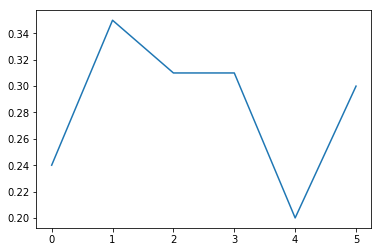

In [86]:
plt.plot(valid_acc)

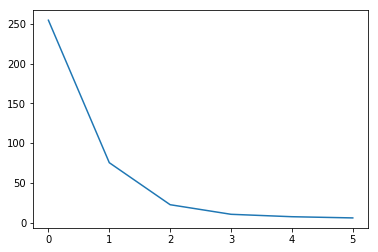

In [87]:
plt.plot(main_losses)

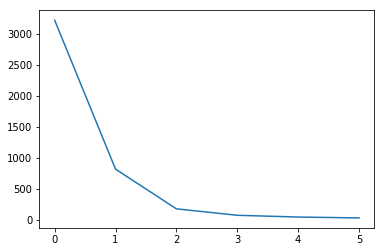

In [88]:
plt.plot(acro_losses)

In [91]:
num_steps = 5000
prefix = 'brown-steps-{}-'.format(11000)
nce_start_time = dt.datetime.now()
valid_acc, main_losses, acro_losses = run(graph, num_steps, prefix=prefix, start_step = 11000)
nce_end_time = dt.datetime.now()
print("NCE method took {} seconds to run {} iterations".format(
    (nce_end_time-nce_start_time).total_seconds(), num_steps))

INFO:tensorflow:Restoring parameters from /home/rishubj/text/code/chkp/brown-steps-11000-model-final.chkp
Initialized
('Average regular loss at step ', 12000, ': ', 2.342118669450283)
('Average acro loss at step ', 12000, ': ', 10.863835813660174)
Accuracy with 100 examples: 0.25. Expected acc: 0.280112044818
('Average regular loss at step ', 14000, ': ', 4.2740382409691815)
('Average acro loss at step ', 14000, ': ', 18.306369212143125)
Accuracy with 100 examples: 0.36. Expected acc: 0.2849002849
NCE method took 334.125396 seconds to run 5000 iterations


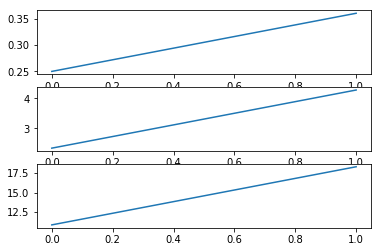

In [95]:

plt.subplot(3, 1, 1)
plt.plot(valid_acc)

plt.subplot(3, 1, 2)
plt.plot(main_losses)

plt.subplot(3, 1, 3)
plt.plot(acro_losses)

plt.show()

In [106]:
def cos_sim(vA, vB):
    return np.dot(vA, vB) / (np.sqrt(np.dot(vA,vA)) * np.sqrt(np.dot(vB,vB)))

In [97]:
with tf.Session(graph=graph) as session:
    saver = tf.train.Saver() 
    saver.restore(session, '/home/rishubj/text/code/chkp/'+prefix+'model-final.chkp')
    validate(session, verbose=True)

INFO:tensorflow:Restoring parameters from /home/rishubj/text/code/chkp/brown-steps-11000-model-final.chkp
(153141, 3, 'and the', 0)
(625290, 2, 'for a', 0)
(306793, 3, 'and a', 1)
(830755, 2, 'it was', 0)
(687423, 1, 'in an', 2)
(315107, 1, 'and down', 1)
(690023, 2, 'as the', 2)
(123137, 2, 'to the', 0)
(797825, 0, 'of his', 0)
(507277, 0, 'it is', 0)
(345282, 1, 'and in', 0)
(853615, 1, 'a few', 0)
(162408, 1, 'to make', 1)
(370969, 2, 'of a', 0)
(408626, 2, 'as well', 0)
(406400, 2, 'in the', 0)
(929896, 1, 'in his', 0)
(188038, 1, 'a man', 0)
(904738, 1, 'i could', 0)
(576493, 2, 'to be', 0)
(669386, 2, 'to a', 0)
(790576, 1, 'of the', 0)
(945706, 3, 'instead of', 1)
(28463, 2, 'to a', 0)
(842784, 2, 'to see', 2)
(921214, 3, 'in the', 0)
(853358, 2, 'and i', 1)
(948282, 1, 'he could', 0)
(760508, 2, 'to see', 2)
(460042, 2, 'with the', 0)
(384449, 1, 'we must', 1)
(374760, 0, 'they are', 1)
(39314, 1, 'she had', 0)
(757695, 2, 'the church', 0)
(945848, 3, 'the world', 1)
(274410, 3

In [98]:
def get_word_embedding(word):
    with tf.Session(graph=graph) as session:
        saver = tf.train.Saver() 
        saver.restore(session, '/home/rishubj/text/code/chkp/'+prefix+'model-final.chkp')

        return (tf.nn.embedding_lookup(embeddings, dictionary[word]).eval())
        

In [107]:
embs = list(map(get_word_embedding, ['reason', 'and', 'or']))
def get_pair_diffs(embs):
    for i,emb1 in enumerate(embs):
        for j,emb2 in enumerate(embs):    
            if i>j:
                print (i,j,np.sum(np.square(emb1-emb2)), cos_sim(emb1, emb2))
get_pair_diffs(embs)

INFO:tensorflow:Restoring parameters from /home/rishubj/text/code/chkp/brown-steps-11000-model-final.chkp
INFO:tensorflow:Restoring parameters from /home/rishubj/text/code/chkp/brown-steps-11000-model-final.chkp
INFO:tensorflow:Restoring parameters from /home/rishubj/text/code/chkp/brown-steps-11000-model-final.chkp
(1, 0, 84.48552, 0.36624822)
(2, 0, 95.156586, 0.3921986)
(2, 1, 76.2211, 0.45236146)


In [102]:
[[a for a in acc.split()] for acc in acro_dct['gt']]

[['going', 'to'], ['go', 'to'], ['get', 'the'], ['gt']]

In [103]:
tf.logging.set_verbosity(tf.logging.ERROR)
baseline_embs = [sum([get_word_embedding(a) for a in acc.split()]) for acc in acro_dct['gt']]
get_pair_diffs(baseline_embs)
chosen_keys = np.random.choice(acro_dct.keys(), 10, replace=False)

for i,key in enumerate(chosen_keys):
    key_emb = get_word_embedding(key)
    avg_acro_emb = [sum([get_word_embedding(a) for a in acc.split()]) for acc in acro_dct[key]]
    diffs = [np.sum(np.square(emb1-key_emb)) for emb1 in avg_acro_emb]
    baseline_diffs = [np.sum(np.square(emb1-key_emb)) for emb1 in baseline_embs]
    get_pair_diffs(avg_acro_emb)
    print(key, acro_dct[key], diffs, baseline_diffs)

tf.logging.set_verbosity(tf.logging.INFO)


(1, 0, 100.428406)
(2, 0, 164.23688)
(2, 1, 135.96286)
(3, 0, 128.01617)
(3, 1, 142.86218)
(3, 2, 140.83066)
(1, 0, 90.88211)
(2, 0, 83.14571)
(2, 1, 76.27577)
(3, 0, 191.47186)
(3, 1, 181.21515)
(3, 2, 180.18509)
('bw', ['but we', 'but when', 'but what', 'bw'], [191.47186, 181.21515, 180.18509, 0.0], [180.62204, 179.11804, 126.066635, 99.15965])
(1, 0, 170.3965)
(2, 0, 228.48177)
(2, 1, 175.42642)
(3, 0, 163.83879)
(3, 1, 159.65094)
(3, 2, 74.80139)
('no', ['number of', 'not only', 'no one', 'no'], [163.83879, 159.65094, 74.80139, 0.0], [145.78696, 132.2341, 120.271866, 90.271454])
(1, 0, 97.00676)
(2, 0, 95.85985)
(2, 1, 99.26204)
(3, 0, 186.80972)
(3, 1, 179.56418)
(3, 2, 166.32327)
('ys', ['you say', 'you see', 'you should', 'ys'], [186.80972, 179.56418, 166.32327, 0.0], [155.16168, 168.66434, 121.833176, 95.63918])
(1, 0, 85.770096)
(2, 0, 85.939545)
(2, 1, 96.87598)
('sy', ['said you', 'so you', 'see you'], [178.76996, 192.42989, 172.64941], [184.19571, 200.49649, 127.98596, 95.2

In [108]:
tf.logging.set_verbosity(tf.logging.ERROR)
baseline_embs = [sum([get_word_embedding(a) for a in acc.split()]) for acc in acro_dct['gt']]
get_pair_diffs(baseline_embs)
chosen_keys = np.random.choice(acro_dct.keys(), 10, replace=False)

for i,key in enumerate(chosen_keys):
    key_emb = get_word_embedding(key)
    avg_acro_emb = [sum([get_word_embedding(a) for a in acc.split()]) for acc in acro_dct[key]]
    diffs = [(np.sum(np.square(emb1-key_emb)), cos_sim(emb1, key_emb)) for emb1 in avg_acro_emb]
    baseline_diffs = [(np.sum(np.square(emb1-key_emb)), cos_sim(emb1, key_emb)) for emb1 in baseline_embs]
    get_pair_diffs(avg_acro_emb)
    print(key, acro_dct[key], diffs, baseline_diffs)

tf.logging.set_verbosity(tf.logging.INFO)


(1, 0, 100.428406, 0.72483337)
(2, 0, 164.23688, 0.4909631)
(2, 1, 135.96286, 0.6024802)
(3, 0, 128.01617, 0.52057517)
(3, 1, 142.86218, 0.5045385)
(3, 2, 140.83066, 0.3649831)
(1, 0, 165.18912, 0.542567)
(2, 0, 167.8566, 0.5532598)
(2, 1, 88.34346, 0.73700744)
('ho', ['his own', 'half of', 'history of'], [(185.74353, 0.3377572), (140.80896, 0.40280277), (143.83365, 0.44798553)], [(161.19272, 0.35740247), (151.83081, 0.46114996), (127.732185, 0.42679214), (88.57642, 0.29142246)])
(1, 0, 101.60777, 0.73538816)
(2, 0, 176.60388, 0.51117)
(2, 1, 178.80844, 0.49976194)
('ik', ['i know', 'i knew', 'is known'], [(179.6099, 0.3514278), (190.56964, 0.28914672), (158.20474, 0.35072473)], [(154.98935, 0.3932453), (161.11703, 0.42219943), (142.1923, 0.35866496), (92.191025, 0.28197667)])
(1, 0, 189.49849, 0.51818293)
(2, 0, 86.42021, 0.7740331)
(2, 1, 184.56628, 0.5335789)
('wc', ['we can', 'was called', 'we could'], [(168.34698, 0.3926527), (173.28806, 0.414851), (176.85315, 0.363563)], [(167.83

In [ ]:

# prefix=''

# with tf.Session(graph=graph) as session:
#     saver = tf.train.Saver() 
#     saver.restore(session, '/home/rishubj/text/code/chkp/'+prefix+'model-final.chkp')
#     feed_dict = {train_inputs: batch_inputs, train_context: batch_context}

#     # We perform one update step by evaluating the optimizer op (including it
#     # in the list of returned values for session.run()

#     loss_val = session.run(nce_loss, feed_dict=feed_dict)
#     average_loss += loss_val



#     # Now, redo it for acronyms:
#     data_word = acro_data[0]

#     acro_batch_inputs = []
#     acro_batch_context = []
#     for single_acro_data in data_word:
#         a,b = generate_batch_from_acro_data(single_acro_data,
#                 acro_batch_size, skip_window)
#         acro_batch_inputs.append(a)
#         acro_batch_context.append(b)
#     acro_feed_dict = {train_acro_inputs: acro_batch_inputs, train_acro_context: acro_batch_context}
#     best_acro = session.run(best_acro_chosen, feed_dict=acro_feed_dict)
#     print(best_acro, data_word)